# **Extract Dataset**

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/drive/folders/14MO6HB6HEBbFB_Z7PW3wx4lI3HLolMeW?usp=sharing' -O "ball_datasets.zip"
!unzip "ball_datasets.zip"

--2022-02-04 07:51:42--  https://drive.google.com/drive/folders/14MO6HB6HEBbFB_Z7PW3wx4lI3HLolMeW?usp=sharing
Resolving drive.google.com (drive.google.com)... 142.250.1.100, 142.250.1.138, 142.250.1.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.1.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ball_datasets.zip’

ball_datasets.zip       [  <=>               ] 223.43K   761KB/s    in 0.3s    

2022-02-04 07:51:42 (761 KB/s) - ‘ball_datasets.zip’ saved [228789]

Archive:  ball_datasets.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ball_datasets.zip or
        ball_datasets.zip.zip, and cannot find ball_datasets.zip.ZIP, period.


In [ ]:
from IPython.display import Image, clear_output  # to display images
# from utils.google_utils import gdrive_download  # to download models/datasets
# https://app.roboflow.com/ds/r9CZBvehCm?key=Oj22iCuGv7
!pip install pyyaml
import yaml

import urllib
import urllib.request

drive_url = 'https://drive.google.com/drive/folders/1CobZplYD9xlsSGhV5toa7KeoezzOpA1q?usp=sharing'
file_name = 'ball_datasets.zip'

urllib.request.urlretrieve(drive_url, file_name)
print('Download completed!')

!unzip ball_datasets.zip
# !jar xvf /content/ball_datasets.zip

Download completed!
Archive:  ball_datasets.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ball_datasets.zip or
        ball_datasets.zip.zip, and cannot find ball_datasets.zip.ZIP, period.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install -q keras
import keras
%cd /content/drive/My Drive/ball_datasets/
!unzip -q ball_datasets.zip

Mounted at /content/drive
/content/drive/My Drive/ball_datasets
[ball_datasets.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ball_datasets.zip or
        ball_datasets.zip.zip, and cannot find ball_datasets.zip.ZIP, period.


# **Clone YOLOV5**

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd /content//drive/My Drive/ball_datasets/yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 10941, done.
remote: Total 10941 (delta 0), reused 0 (delta 0), pack-reused 10941
Receiving objects: 100% (10941/10941), 11.02 MiB | 24.54 MiB/s, done.
Resolving deltas: 100% (7554/7554), done.
/content/drive/My Drive/ball_datasets/yolov5
     |████████████████████████████████| 596 kB 5.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
ls -a


CONTRIBUTING.md  .git/           .pre-commit-config.yaml  tutorial.ipynb
data/            .gitattributes  __pycache__/             utils/
data.yaml        .github/        README.md                val.py
detect.py        .gitignore      requirements.txt         yolov5s.pt
Dockerfile       hubconf.py      runs/
.dockerignore    LICENSE         setup.cfg
export.py        models/         train.py


In [ ]:
rm -rf yolov5/

In [ ]:
!ls "/content/drive/My Drive/ball_datasets/dataset"

data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


# **Training Model**

In [ ]:
with open('data.yaml', 'w+') as file:
    file.write(
        """
        train: /content/drive/MyDrive/ball_datasets/dataset/train/images
        val: /content/drive/MyDrive/ball_datasets/dataset/valid/images

        nc: 1
        names: ['Bola']
        """
    )


In [ ]:
ls -a

CONTRIBUTING.md  export.py       LICENSE                  runs/
data/            .git/           models/                  setup.cfg
data.yaml        .gitattributes  .pre-commit-config.yaml  train.py
detect.py        .github/        __pycache__/             tutorial.ipynb
Dockerfile       .gitignore      README.md                utils/
.dockerignore    hubconf.py      requirements.txt         val.py


In [ ]:
# !python train.py  --img 416 --batch 16 --epochs 50 --data /content/ball_datasets/data.yaml --cfg ./models/yolov5s.yaml --name hasil_yolov5s --cache
!python train.py --img 416 --batch 16 --epochs 50 --data data.yaml --cfg ./models/yolov5s.yaml --name hasil_train_yolov5s --cache

train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=hasil_train_yolov5s, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 1 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (1/1), done.
From https://github.com/ultralytics/yolov5
   9bc72a3..079b36d  master     -> origin/master
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5

# **Evaluation Metrics**

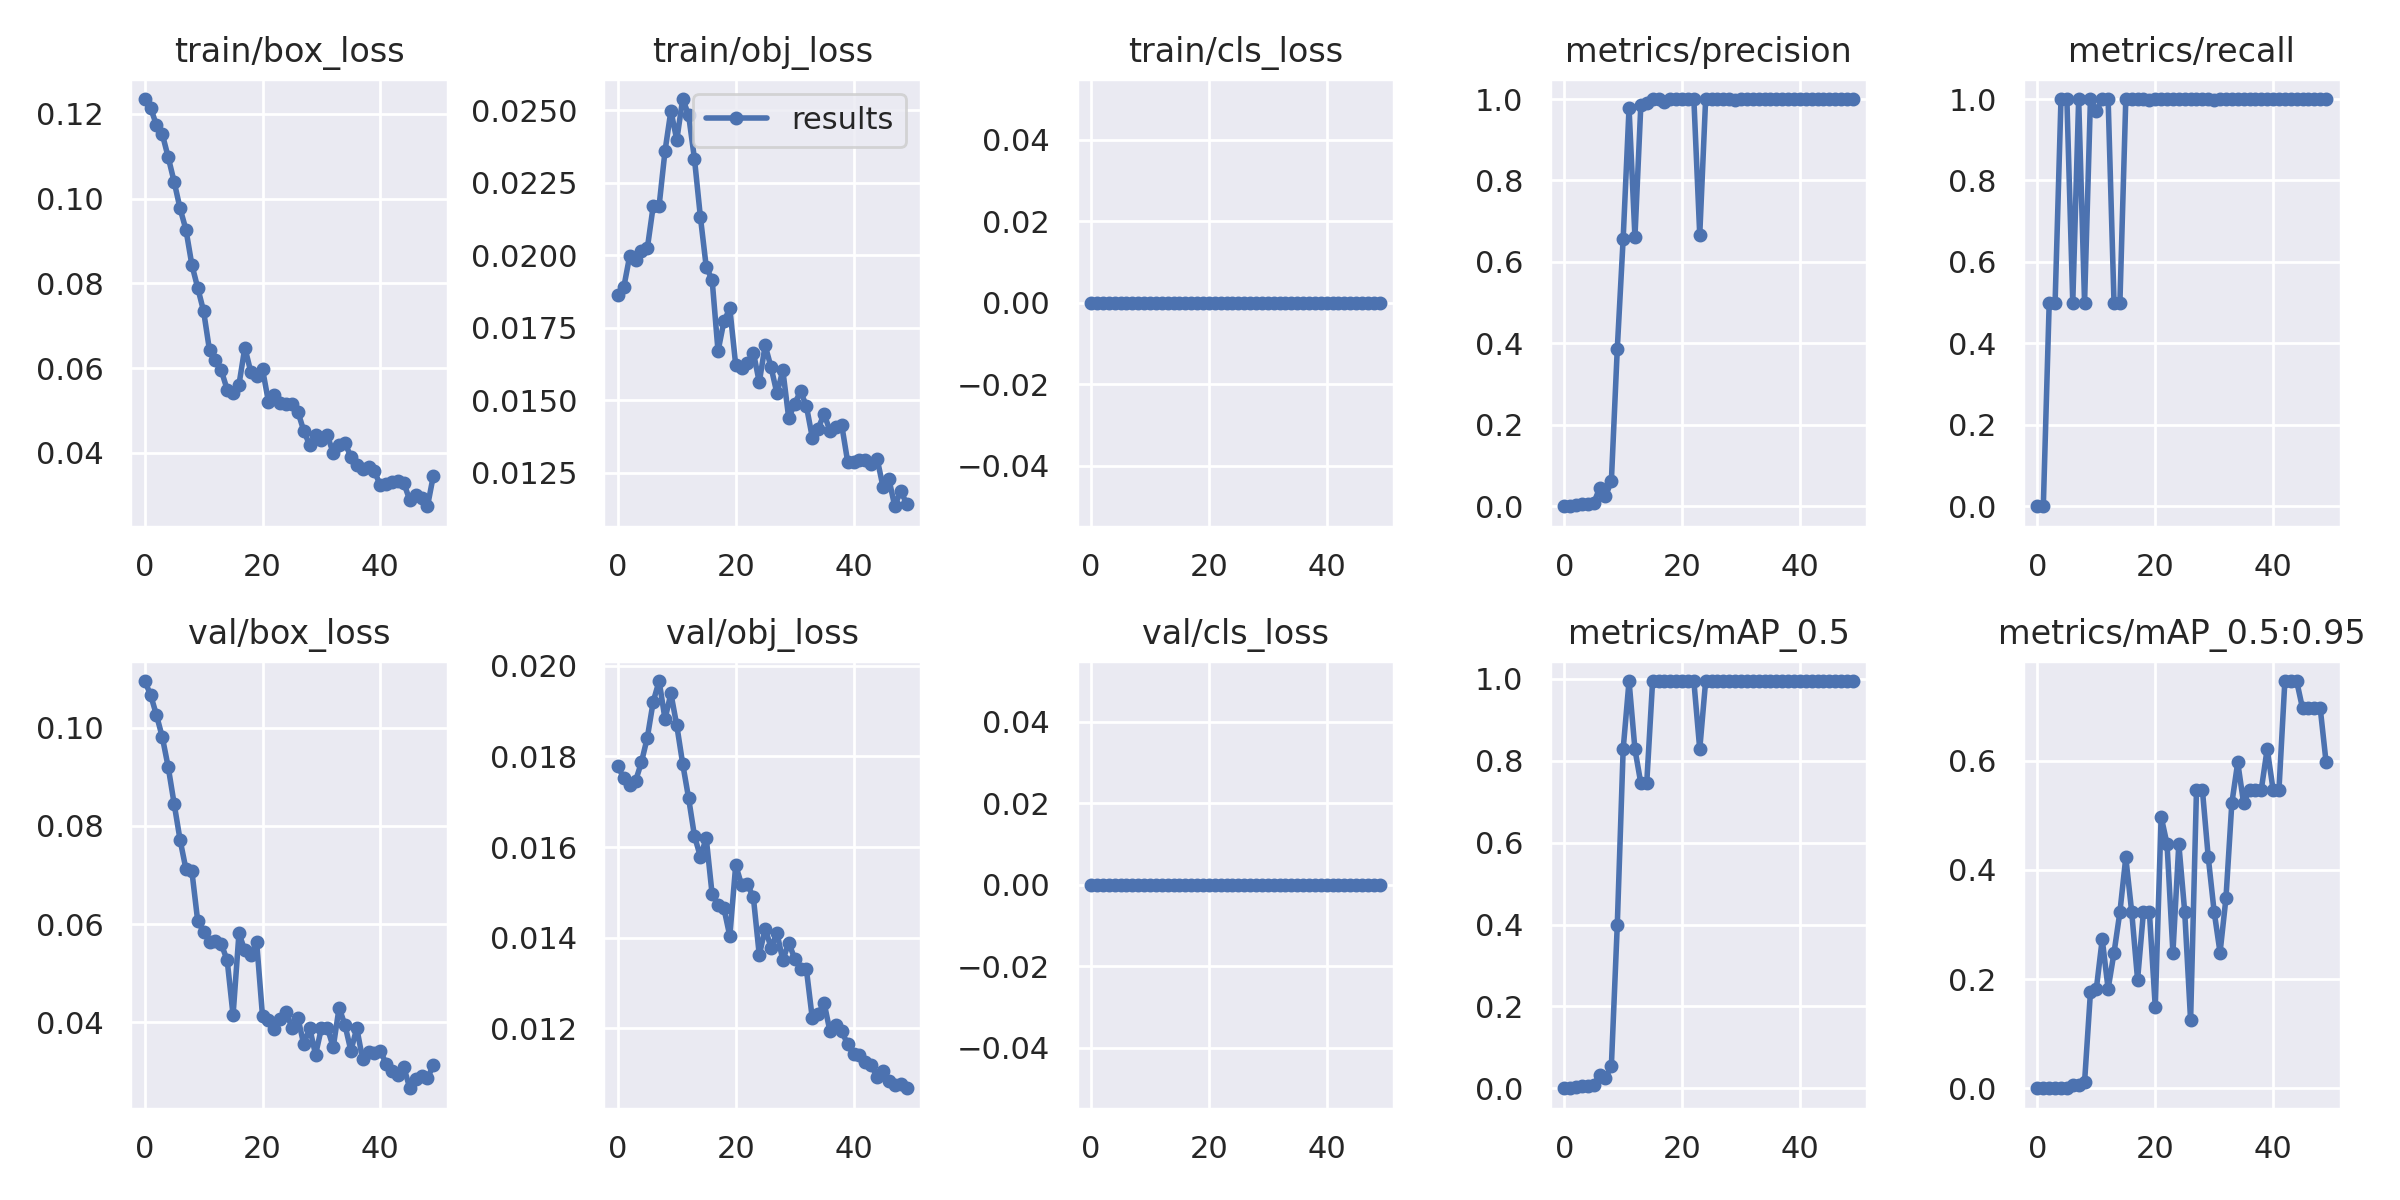

In [ ]:
from IPython.display import Image

Image(filename='/content/drive/MyDrive/ball_datasets/yolov5/runs/train/hasil_train_yolov5s/results.png', width=1000)

# **Deteksi**

In [ ]:
!python detect.py --weights ./runs/train/hasil_train_yolov5s/weights/best.pt --img 416 --conf 0.5 --source /content/drive/MyDrive/ball_datasets/dataset/valid/images/test/

detect: weights=['./runs/train/hasil_train_yolov5s/weights/best.pt'], source=/content/drive/MyDrive/ball_datasets/dataset/valid/images/test/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-231-g9bc72a3 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/50 /content/drive/MyDrive/ball_datasets/dataset/valid/images/test/data32.png: 320x416 1 Bola, Done. (0.026s)
image 2/50 /content/drive/MyDrive/ball_datasets/dataset/valid/images/test/data33.png: 320x416 1 Bola, Done. (0.026s)
image 3/50 /content/drive/MyDrive/ball_datasets/dataset/valid/images/test/data

# **Export Model**

In [ ]:

%cd /content/drive/My Drive/ball_datasets/yolov5/


/content/drive/My Drive/ball_datasets/yolov5


In [ ]:
ls -a

ball_datasets/            ball_datasets.zip  dataset/   yolov5/
ball_datasets_tflite.zip  best.pt            data.yaml


In [ ]:
python export.py --weights yolov5s.pt --include tflite --int8 --img 320 --data.yaml


In [ ]:
!python export.py --weights yolov5s.pt --include tflite --int8

In [ ]:
python detect.py --weights yolov5s-int8.tflite --img 320

In [ ]:
ls -a

CONTRIBUTING.md  .git/           .pre-commit-config.yaml  tutorial.ipynb
data/            .gitattributes  __pycache__/             utils/
data.yaml        .github/        README.md                val.py
detect.py        .gitignore      requirements.txt         yolov5/
Dockerfile       hubconf.py      runs/                    yolov5s.pt
.dockerignore    LICENSE         setup.cfg
export.py        models/         train.py


In [ ]:

!python export.py --weights /content/drive/MyDrive/ball_datasets/best.pt --include saved model pb tflite [--int8] --data yolov5s.yaml --img 640

export: data=yolov5s.yaml, weights=['/content/drive/MyDrive/ball_datasets/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['saved', 'model', 'pb', 'tflite', '[--int8]']
YOLOv5 🚀 v6.0-231-g9bc72a3 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/drive/MyDrive/ball_datasets/best.pt (14.3 MB)

TensorFlow SavedModel: starting export with tensorflow 2.7.0...

                 from  n    params  module                                  arguments                     
2022-02-11 07:29:22.278315: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0                -1  1      3

In [ ]:
import glob
from IPython.display import Image, display

i = 0
for imageName in glob.glob('./runs/detect/exp3/*.png'):
    display(Image(filename=imageName))
    print("\n")
    i += 1
    if i == 50:
      break